In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
# sys.path.append("/private/home/alexandrerame/domainbedv2/")
# sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")

# sys.path.append("/home/rame/domainbedv2/")

sys.path.append("/Users/alexandrerame/code_repository/dataplace/data/logs_experiments_notebook/")
sys.path.append("/Users/alexandrerame/code_repository/codedev/domainbedv2")
from domainbed.codeplot import spider, plot

from matplotlib import rc
spider.plt.style.use('default')

rc('text', usetex=True)
plot.plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
plot.plt.rcParams['text.usetex'] = True
plot.plt.rcParams['font.family'] = 'serif'

# sys.path.append("/data/rame/logs_experiments_notebook/")

In [2]:
from nlp.llamaassistantkl2 import assistant_spider_v2 as assistant_spider
# from nlp.llamareview import review_spider

In [3]:
dict_clean_labels = {
    "rmeld": r"$R_2$",
    "rmdvbv": r"$R_3$",
    "rmdvb": r"$R_4$",
    "rmdvlv": r"$R_1$",
}


dict_colormaps = plot.create_colormaps()
cmap_redpurpleblue = plot.matplotlib.colors.LinearSegmentedColormap.from_list(
    "", [
        plot.get_color_from_cmap("Reds", dict_colormaps),
        plot.get_color_from_cmap("Purples", dict_colormaps),
        plot.get_color_from_cmap("Blues", dict_colormaps)
    ]
)

In [4]:
import math

labels = [
    "rmdvlv",
    "rmeld",
    "rmdvbv",
    "rmdvb",
]
keys_assistant = [
    "init",
    "rmdvlv361",
    "rmeld201",
    # "rmdvbv361",
    "rmdvbv321",
    "rmdvb81",
    "multi",
    # "rmeld201_rmdvbv361_rmdvlv361_rmdvb81",
    "rmeld201_rmdvbv321_rmdvlv361_rmdvb81"
    
]

def get_minmax(list_ls):
    dict_key_to_minmax = {label: [math.inf, -math.inf] for label in labels}
    for line in list_ls:
        for key in dict_key_to_minmax:
            dict_key_to_minmax[key][0] = min(dict_key_to_minmax[key][0], line[key])
            dict_key_to_minmax[key][1] = max(dict_key_to_minmax[key][1], line[key])
    # for key in dict_key_to_minmax.keys():
    #     dict_key_to_minmax[key].append(dict_key_to_minmax[key][1] - dict_key_to_minmax[key][0])
    return dict_key_to_minmax


dict_key_to_minmax_assistant = get_minmax(
    [v for k, v in assistant_spider.l.items() if k in keys_assistant]
)


[0.0, 94.0, 180.0, 266.0]


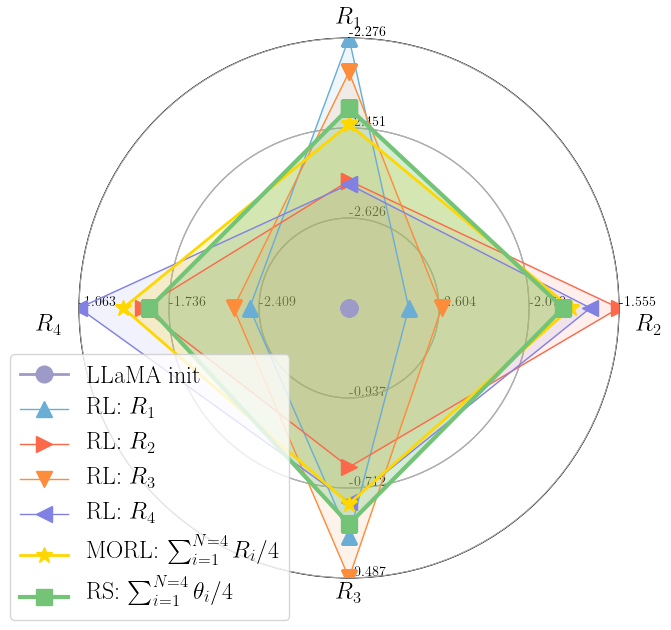

In [8]:
line_labels = [
    "LLaMA init",
    r"RL: $R_1$", r"RL: $R_2$", r"RL: $R_3$", r"RL: $R_4$", r"MORL: $\sum_{i=1}^{N=4} R_i/4$",
    r"RS: $\sum_{i=1}^{N=4} \theta_i/4$"
]
markers = ['o', '^', '>', 'v', '<', '*', 's', 'p', 'h', 'H']
spider.SIZE="xx-large"
colors = [
    plot.get_color_from_cmap("Purples", dict_colormaps),
    plot.get_color_from_cmap("Blues", dict_colormaps),
    plot.get_color_from_cmap("Reds", dict_colormaps),
    plot.get_color_from_cmap("Oranges", dict_colormaps),
    plot.get_color_from_cmap("Dark_Blues", dict_colormaps),
    "gold",
    plot.get_color_from_cmap("Greens", dict_colormaps)
]

dict_index_to_minmax = {i: dict_key_to_minmax_assistant[labels[i]] for i in range(len(labels))}
list_minmax = [dict_key_to_minmax_assistant[labels[i]] for i in range(len(labels))]

import pandas as pd

ranges = list_minmax

clean_labels = []
data = [[assistant_spider.l[key][label] for label in labels] for key in keys_assistant]

result = pd.DataFrame.from_records(
    data, columns=[dict_clean_labels.get(label, label) for label in labels]
)

variables = result.columns

fig1 = spider.plt.figure(figsize=(6, 6))
radar = spider.ComplexRadar(fig1, variables, ranges, show_scales=True, n_ring_levels=4)

for g in result.index:
    is_main = (g == (len(keys_assistant) - 1))
    is_second = (g == (len(keys_assistant) - 2)) or (g == 0)
    radar.plot(
        result.loc[g].values,
        label=line_labels[g],
        color=colors[g],
        marker=markers[g],
        markersize=12,
        linewidth=3 if is_main else (2 if is_second else 1)
    )
    radar.fill(result.loc[g].values, alpha=0.3 if is_main else (0.2 if is_second else 0.1), color=colors[g])

# radar.set_title("Radar chart solution with different scales")
radar.use_legend(loc='lower left', bbox_to_anchor=(-0.15, -0.1), fontsize="xx-large")
spider.plt.show()

# plot.save_fig(fig=fig1, name="nlp/spider_assistant.pdf", do_save=True)
plot.save_fig(fig=fig1, name="/Users/alexandrerame/code_repository/tex/rl_wa/figures/nlp/pdfs/spider_assistant.pdf", do_save=True)
